## Neuron-only sample integration and quality control

This notebook clusters putative neurons only, and assesses quality of neuronal clusters

Import necessary libraries

In [2]:
library(Seurat)
library(dplyr)
library(magrittr)
library("readxl")
library("ggplot2")
library("xlsx")
library(ggplot2)
library(cowplot)

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Iteration 1

Load in raw data for each group, subsetting out neurons

In [ ]:
VTA_YFP.data <-Read10X(data.dir = "D:/scRNAseq/30-453842648/01_analysis/cellranger_count/YFP/raw_feature_bc_matrix")
colnames(VTA_YFP.data) = paste0(colnames(VTA_YFP.data),"VTA_YFP")
VTA_YFP<- CreateSeuratObject(counts = VTA_YFP.data, min.cells = 3, min.features = 200, project = "VTA_input")
new_barcodes <- gsub("-1","",colnames(VTA_YFP))
VTA_YFP <- RenameCells(VTA_YFP, new.names = new_barcodes)
VTA_YFP@meta.data$stim <- "VTA_YFP"
Neuron_id<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/All_cells_iter1/Neuron_VTA_YFP_id.rds")
VTA_YFP<-subset(x = VTA_YFP, cells=Neuron_id)

VTA_LH.data <-Read10X(data.dir = "D:/scRNAseq/30-573274809/01_analysis/cellranger_count/LH/raw_feature_bc_matrix")
colnames(VTA_LH.data) = paste0(colnames(VTA_LH.data),"VTA_LH")
VTA_LH<- CreateSeuratObject(counts = VTA_LH.data, min.cells = 3, min.features = 200, project = "VTA_input")
new_barcodes <- gsub("-1","",colnames(VTA_LH))
VTA_LH <- RenameCells(VTA_LH, new.names = new_barcodes)
VTA_LH@meta.data$stim <- "VTA_LH"
Neuron_id<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/All_cells_iter1/Neuron_VTA_LH_id.rds")
VTA_LH<-subset(x = VTA_LH, cells=Neuron_id)

VTA_NAc.data <-Read10X(data.dir = "D:/scRNAseq/30-573274809/01_analysis/cellranger_count/NAc/raw_feature_bc_matrix")
colnames(VTA_NAc.data) = paste0(colnames(VTA_NAc.data),"VTA_NAc")
VTA_NAc<- CreateSeuratObject(counts = VTA_NAc.data, min.cells = 3, min.features = 200, project = "VTA_input")
new_barcodes <- gsub("-1","",colnames(VTA_NAc))
VTA_NAc <- RenameCells(VTA_NAc, new.names = new_barcodes)
VTA_NAc@meta.data$stim <- "VTA_NAc"
Neuron_id<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/All_cells_iter1/Neuron_VTA_NAc_id.rds")
VTA_NAc<-subset(x = VTA_NAc, cells=Neuron_id)

VTA_PFC.data <-Read10X(data.dir = "D:/scRNAseq/30-573274809/01_analysis/cellranger_count/PFC/raw_feature_bc_matrix")
colnames(VTA_PFC.data) = paste0(colnames(VTA_PFC.data),"VTA_PFC")
VTA_PFC<- CreateSeuratObject(counts = VTA_PFC.data, min.cells = 3, min.features = 200, project = "VTA_input")
new_barcodes <- gsub("-1","",colnames(VTA_PFC))
VTA_PFC <- RenameCells(VTA_PFC, new.names = new_barcodes)
VTA_PFC@meta.data$stim <- "VTA_PFC"
Neuron_id<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/All_cells_iter1/Neuron_VTA_PFC_id.rds")
VTA_PFC<-subset(x = VTA_PFC, cells=Neuron_id)

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =VTA_YFP), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = VTA_YFP, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = VTA_YFP, slot = 'counts'))
VTA_YFP[['percent.mito']] <- percent.mito

mito.features <- grep(pattern = "^mt-", x = rownames(x =VTA_LH), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = VTA_LH, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object =VTA_LH, slot = 'counts'))
VTA_LH[['percent.mito']] <- percent.mito

mito.features <- grep(pattern = "^mt-", x = rownames(x =VTA_NAc), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = VTA_NAc, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = VTA_NAc, slot = 'counts'))
VTA_NAc[['percent.mito']] <- percent.mito

mito.features <- grep(pattern = "^mt-", x = rownames(x =VTA_PFC), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = VTA_PFC, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = VTA_PFC, slot = 'counts'))
VTA_PFC[['percent.mito']] <- percent.mito


Sample normalization, scaling, integration, and dimensionality reduction

In [ ]:
VTA_YFP<- NormalizeData(object = VTA_YFP,verbose = FALSE) 
VTA_LH <- NormalizeData(object = VTA_LH,verbose = FALSE) 
VTA_NAc <- NormalizeData(object = VTA_NAc,verbose = FALSE)
VTA_PFC <- NormalizeData(object = VTA_PFC,verbose = FALSE) 

In [ ]:
VTA_YFP<- FindVariableFeatures(object =VTA_YFP,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object = VTA_YFP))
VTA_LH<- FindVariableFeatures(object =VTA_LH,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object =VTA_LH))
VTA_NAc<- FindVariableFeatures(object =VTA_NAc,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object = VTA_NAc))
VTA_PFC<- FindVariableFeatures(object =VTA_PFC,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object = VTA_PFC))

In [ ]:
VTA.list<-objects()
VTA.list$VTA_YFP<-VTA_YFP
VTA.list$VTA_LH<-VTA_LH
VTA.list$VTA_NAc<-VTA_NAc
VTA.list$VTA_PFC<-VTA_PFC

In [ ]:
reference.list <- VTA.list[c("VTA_YFP","VTA_LH","VTA_NAc","VTA_PFC")]
VTA.anchors <- FindIntegrationAnchors(object.list = reference.list, dims = 1:30)
VTA.integrated <- IntegrateData(anchorset = VTA.anchors, dims = 1:30)

In [ ]:
VTA.integrated <- ScaleData(object = VTA.integrated, , vars.to.regress = c("nCount_RNA", "percent.mito"),verbose = FALSE)

In [ ]:
VTA.integrated <- RunPCA(object = VTA.integrated, npcs = 30, verbose = FALSE)# npcs 50 default

In [ ]:
VTA.integrated <- RunUMAP(object = VTA.integrated, reduction = "pca", dims = 1:30)

In [ ]:
DimPlot(object = VTA.integrated, reduction = "umap", group.by = "stim")

Identifying clusters

In [ ]:
VTA.integrated <- FindNeighbors(object = VTA.integrated, dims=1:30)

In [ ]:
VTA.integrated <- FindClusters(VTA.integrated, resolution = 0.4, dims.use = 1:30)

Loading in previously generated .rds files (seurat objects)

In [1]:
VTA.integrated<-readRDS(file="/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter3/VTA_integrated.rds")
VTA_YFP <- readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter3/VTA_YFP.rds")
VTA_LH <- readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter3/VTA_LH.rds")
VTA_PFC <- readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter3/VTA_PFC.rds")
VTA_NAc <- readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter3/VTA_NAc.rds")

Assigning names to cell types

In [3]:
new.ident <- c("VTA1","VTA2","VTA3","VTA4","VTA5","VTA6","VTA7","VTA8","VTA9","VTA10","VTA11","VTA12","VTA13")
names(x = new.ident) <- levels(x =VTA.integrated)
VTA.integrated<- RenameIdents(object =VTA.integrated, new.ident)

In [4]:
table(Idents(VTA.integrated))


 VTA1  VTA2  VTA3  VTA4  VTA5  VTA6  VTA7  VTA8  VTA9 VTA10 VTA11 VTA12 VTA13 
 4118  2639  2081  1673  1512  1219   816   785   723   672   414   239    64 

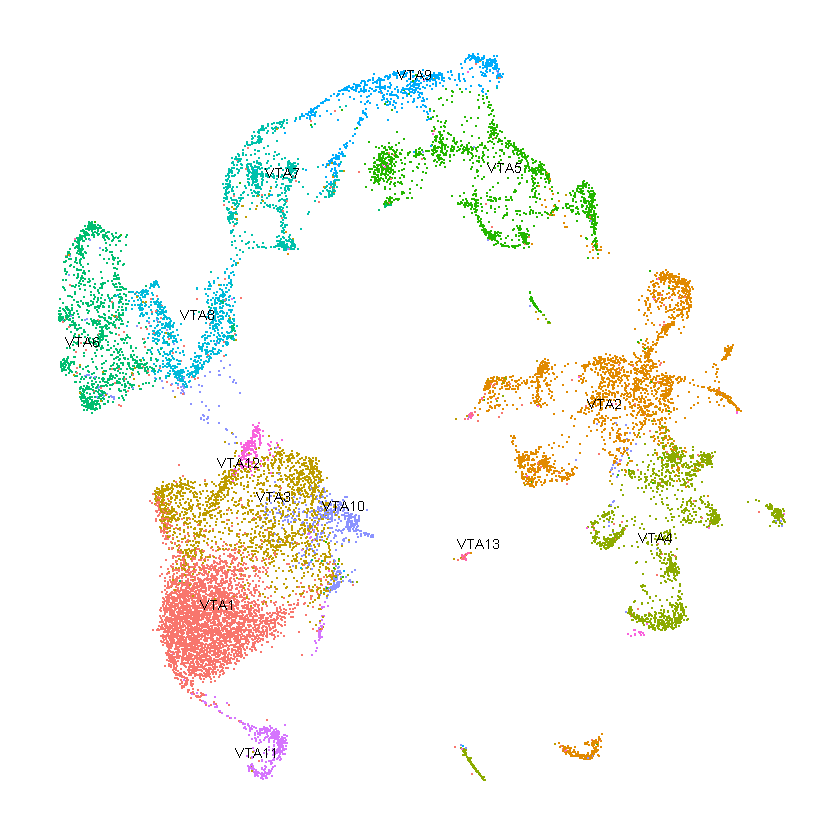

In [9]:
DimPlot(object = VTA.integrated, reduction = "umap", label = TRUE, repel = TRUE, pt.size = 0.1, label.size=3) +
theme_classic() + 
NoLegend() + 
theme(axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())

Extract barcodes as variable names, and assign to metadata

In [6]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(VTA.integrated@assays$RNA@data[,which(Idents(object=VTA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_VTA_YFP",sep=""),intersect(colnames(VTA_YFP@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_VTA_LH",sep=""),intersect(colnames(VTA_LH@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_VTA_NAc",sep=""),intersect(colnames(VTA_NAc@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_VTA_PFC",sep=""),intersect(colnames(VTA_PFC@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

In [7]:
barcode_names <- unique(paste(Idents(VTA.integrated),"_barcode",sep=""))

In [8]:
celltype<-vector()
for (i in 1:dim(VTA.integrated@meta.data)[1]){
    celltype[i]<-toString(new.ident[VTA.integrated@meta.data$integrated_snn_res.0.4[i]])
}
VTA.integrated@meta.data$celltype<-celltype

Plotting the number of cells per cell cluster

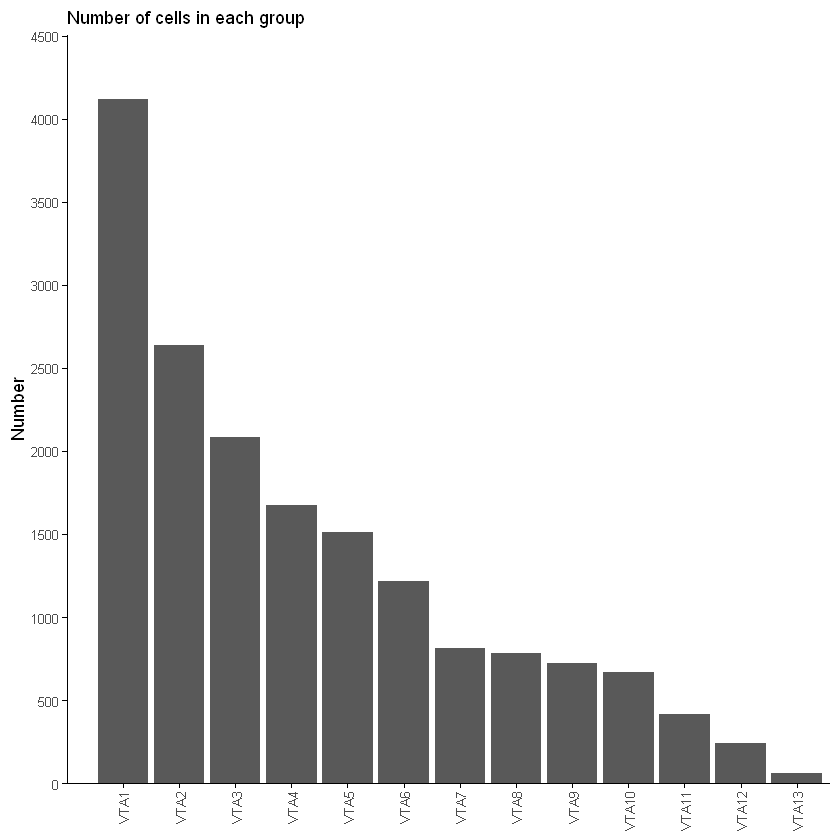

In [11]:
Cells_in_clusters <- as.data.frame(table(Idents(VTA.integrated)))

colnames(Cells_in_clusters)[1] <- "Cluster"
colnames(Cells_in_clusters)[2] <- "Number"

Cells_in_clusters$Cluster <- factor(Cells_in_clusters$Cluster, levels = c("VTA1","VTA2","VTA3","VTA4","VTA5","VTA6","VTA7","VTA8","VTA9","VTA10","VTA11","VTA12","VTA13"))

p <- ggplot(data=Cells_in_clusters, aes (x=Cluster, y=Number)) +
geom_bar(stat="identity", position="identity") +
scale_y_continuous(breaks = seq(0, 4503, by = 500), limits=c(0,4503), expand = c(0, 0))+
theme_classic() +
theme(axis.line = element_line(color="black",size=0.1), axis.title.x= element_blank(), axis.text.y=element_text(size=8) ,axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=8, ) ,plot.title=element_text(size=11)) +
theme(legend.title = element_text(size = 10),legend.text = element_text(size = 8), axis.ticks = element_line(colour = "black", size = .25), axis.line = element_line(colour = 'black', size = .25))+
ggtitle("Number of cells in each group") +
expand_limits(x = 0, y = 0) 
#scale_fill_manual(values=group.colors)
p

Proportion of cells in each group

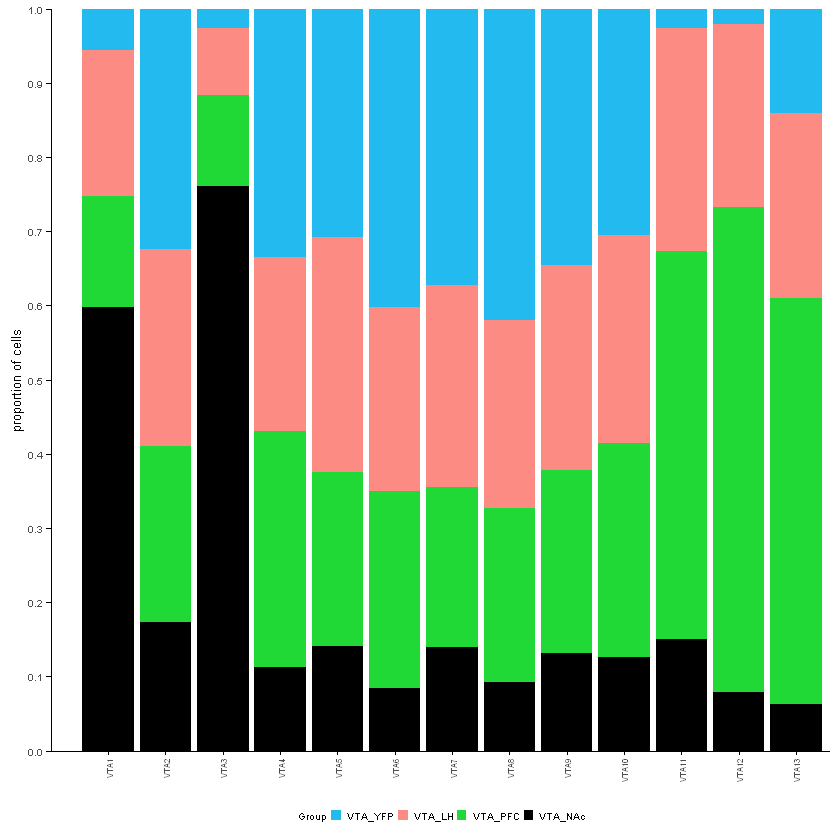

In [14]:
subset <- as.data.frame(table(Idents(VTA.integrated)))
cluster_numbers<- subset[2]

subset <- rep(array(unlist(cluster_numbers)),4)

cluster_by_group <- as.data.frame(table(Idents(VTA.integrated), VTA.integrated$stim))
colnames(cluster_by_group) <- c("Cluster","Group","Cells")
cluster_by_group$Total <- subset

cluster_by_group <- transform(cluster_by_group, prop = Cells/Total)

cluster_by_group$Cluster<-factor(cluster_by_group$Cluster, levels=c("VTA1","VTA2","VTA3","VTA4","VTA5","VTA6","VTA7","VTA8","VTA9","VTA10","VTA11","VTA12","VTA13"))

cluster_by_group$Group <- factor(cluster_by_group$Group, levels = c("VTA_YFP","VTA_LH","VTA_PFC","VTA_NAc"), ordered=TRUE)
cluster_by_group$Cluster <- factor(cluster_by_group$Cluster, levels = c("VTA1","VTA2","VTA3","VTA4","VTA5","VTA6","VTA7","VTA8","VTA9","VTA10","VTA11","VTA12","VTA13"))
group.colors <- c(VTA_YFP="#23bbef",VTA_LH="#fc8b84", VTA_PFC="#21d936", VTA_NAc="black")
p <- ggplot(data=cluster_by_group, aes (x=Cluster, y=prop, fill=Group)) +
    geom_bar(stat="identity", position="stack") +
    scale_y_continuous(breaks = seq(0, 1, by = .1), limits=c(0,1), expand = c(0, 0))+
    theme_classic() +
    theme(axis.line = element_line(color="black",size=0.25), 
          axis.text.y=element_text(size=6),
          axis.title.x = element_blank(), 
          axis.title.y = element_text(size=8),
          axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=5, ) ,
          plot.title=element_blank()) +
    theme(legend.position='bottom',
          legend.title = element_text(size = 6),
          legend.text = element_text(size = 6), 
          axis.ticks = element_line(colour = "black", size = .25), 
          axis.line = element_line(colour = 'black', size = .25),
         legend.key.size = unit(0.1, "in"))+
    ggtitle("Proportion of cells") +
    expand_limits(x = 0, y = 0) +
    scale_fill_manual(values=group.colors)+
    ylab("proportion of cells")
p


Plotting UMIs and genes for each cell cluster

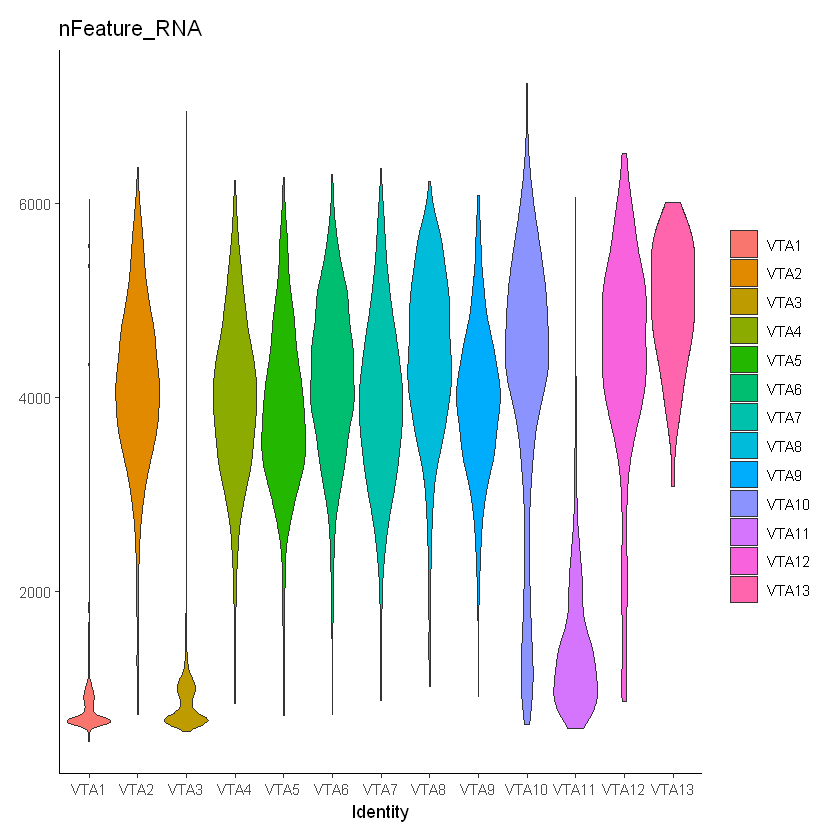

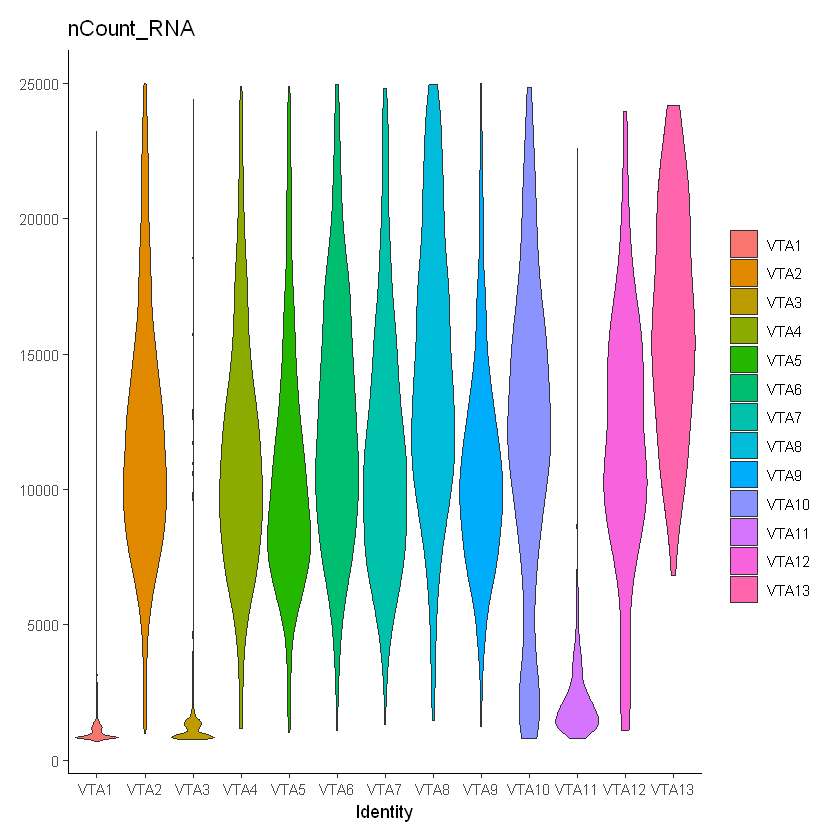

In [15]:
VlnPlot(object = VTA.integrated, features = c('nFeature_RNA'), pt.size=0) + theme_classic()
VlnPlot(object = VTA.integrated, features = c('nCount_RNA'), pt.size=0) + theme_classic()

Removing VTA1, VTA3 and VTA11 from the dataset due to depleted read coverage and poor group representation

In [16]:
bad_cells <- c(VTA1_barcode, VTA3_barcode, VTA11_barcode)

In [21]:
#generates barcodes for retained cells (i.e. excluding VTA1, VTA3, and VTA11)
Retained_cells_YFP_id <- colnames(subset(VTA_YFP, cells=bad_cells, invert=TRUE))
Retained_cells_LH_id <- colnames(subset(VTA_LH, cells=bad_cells, invert=TRUE ))
Retained_cells_PFC_id <- colnames(subset(VTA_PFC, cells=bad_cells, invert=TRUE))
Retained_cells_NAc_id <- colnames(subset(VTA_NAc, cells=bad_cells, invert=TRUE))

## Iteration 2

In [ ]:
VTA_YFP.data <-Read10X(data.dir = "D:/scRNAseq/30-453842648/01_analysis/cellranger_count/YFP/raw_feature_bc_matrix")
colnames(VTA_YFP.data) = paste0(colnames(VTA_YFP.data),"VTA_YFP")
VTA_YFP<- CreateSeuratObject(counts = VTA_YFP.data, min.cells = 3, min.features = 200, project = "VTA_input")
new_barcodes <- gsub("-1","",colnames(VTA_YFP))
VTA_YFP <- RenameCells(VTA_YFP, new.names = new_barcodes)
VTA_YFP@meta.data$stim <- "VTA_YFP"
Neuron_id<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter3/Retained_cells_YFP_id.rds")
VTA_YFP<-subset(x = VTA_YFP, cells=Neuron_id,)

VTA_LH.data <-Read10X(data.dir = "D:/scRNAseq/30-573274809/01_analysis/cellranger_count/LH/raw_feature_bc_matrix")
colnames(VTA_LH.data) = paste0(colnames(VTA_LH.data),"VTA_LH")
VTA_LH<- CreateSeuratObject(counts = VTA_LH.data, min.cells = 3, min.features = 200, project = "VTA_input")
new_barcodes <- gsub("-1","",colnames(VTA_LH))
VTA_LH <- RenameCells(VTA_LH, new.names = new_barcodes)
VTA_LH@meta.data$stim <- "VTA_LH"
Neuron_id<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter3/Retained_cells_LH_id.rds")
VTA_LH<-subset(x = VTA_LH, cells=Neuron_id)

VTA_NAc.data <-Read10X(data.dir = "D:/scRNAseq/30-573274809/01_analysis/cellranger_count/NAc/raw_feature_bc_matrix")
colnames(VTA_NAc.data) = paste0(colnames(VTA_NAc.data),"VTA_NAc")
VTA_NAc<- CreateSeuratObject(counts = VTA_NAc.data, min.cells = 3, min.features = 200, project = "VTA_input")
new_barcodes <- gsub("-1","",colnames(VTA_NAc))
VTA_NAc <- RenameCells(VTA_NAc, new.names = new_barcodes)
VTA_NAc@meta.data$stim <- "VTA_NAc"
Neuron_id<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter3/Retained_cells_NAc_id.rds")
VTA_NAc<-subset(x = VTA_NAc, cells=Neuron_id)

VTA_PFC.data <-Read10X(data.dir = "D:/scRNAseq/30-573274809/01_analysis/cellranger_count/PFC/raw_feature_bc_matrix")
colnames(VTA_PFC.data) = paste0(colnames(VTA_PFC.data),"VTA_PFC")
VTA_PFC<- CreateSeuratObject(counts = VTA_PFC.data, min.cells = 3, min.features = 200, project = "VTA_input")
new_barcodes <- gsub("-1","",colnames(VTA_PFC))
VTA_PFC <- RenameCells(VTA_PFC, new.names = new_barcodes)
VTA_PFC@meta.data$stim <- "VTA_PFC"
Neuron_id<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter3/Retained_cells_PFC_id.rds")
VTA_PFC<-subset(x = VTA_PFC, cells=Neuron_id)


In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =VTA_YFP), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = VTA_YFP, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = VTA_YFP, slot = 'counts'))
VTA_YFP[['percent.mito']] <- percent.mito

mito.features <- grep(pattern = "^mt-", x = rownames(x =VTA_LH), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = VTA_LH, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object =VTA_LH, slot = 'counts'))
VTA_LH[['percent.mito']] <- percent.mito

mito.features <- grep(pattern = "^mt-", x = rownames(x =VTA_NAc), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = VTA_NAc, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = VTA_NAc, slot = 'counts'))
VTA_NAc[['percent.mito']] <- percent.mito

mito.features <- grep(pattern = "^mt-", x = rownames(x =VTA_PFC), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = VTA_PFC, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = VTA_PFC, slot = 'counts'))
VTA_PFC[['percent.mito']] <- percent.mito


Sample normalization, scaling, integration, and dimensionality reduction

In [ ]:
VTA_YFP<- NormalizeData(object = VTA_YFP,verbose = FALSE) 
VTA_LH <- NormalizeData(object = VTA_LH,verbose = FALSE) 
VTA_NAc <- NormalizeData(object = VTA_NAc,verbose = FALSE)
VTA_PFC <- NormalizeData(object = VTA_PFC,verbose = FALSE) 

In [ ]:
VTA_YFP<- FindVariableFeatures(object =VTA_YFP,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object = VTA_YFP))
VTA_LH<- FindVariableFeatures(object =VTA_LH,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object =VTA_LH))
VTA_NAc<- FindVariableFeatures(object =VTA_NAc,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object = VTA_NAc))
VTA_PFC<- FindVariableFeatures(object =VTA_PFC,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object = VTA_PFC))

In [ ]:
VTA.list<-objects()
VTA.list$VTA_YFP<-VTA_YFP
VTA.list$VTA_LH<-VTA_LH
VTA.list$VTA_NAc<-VTA_NAc
VTA.list$VTA_PFC<-VTA_PFC

In [ ]:
reference.list <- VTA.list[c("VTA_YFP","VTA_LH","VTA_NAc","VTA_PFC")]
VTA.anchors <- FindIntegrationAnchors(object.list = reference.list, dims = 1:30)
VTA.integrated <- IntegrateData(anchorset = VTA.anchors, dims = 1:30)

In [ ]:
VTA.integrated <- ScaleData(object = VTA.integrated, , vars.to.regress = c("nCount_RNA", "percent.mito"),verbose = FALSE)

In [ ]:
VTA.integrated <- RunPCA(object = VTA.integrated, npcs = 30, verbose = FALSE)# npcs 50 default

In [ ]:
VTA.integrated <- RunUMAP(object = VTA.integrated, reduction = "pca", dims = 1:30)

In [ ]:
DimPlot(object = VTA.integrated, reduction = "umap", group.by = "stim")

Identifying clusters

In [ ]:
VTA.integrated <- FindNeighbors(object = VTA.integrated, dims=1:30)

In [ ]:
VTA.integrated <- FindClusters(VTA.integrated, resolution = 0.4, dims.use = 1:30)

Loading in previously generated .rds files (seurat objects)

In [49]:
VTA.integrated<-readRDS(file="/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter5/VTA_integrated.rds")
VTA_YFP <- readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter5/VTA_YFP.rds")
VTA_LH <- readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter5/VTA_LH.rds")
VTA_PFC <- readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter5/VTA_PFC.rds")
VTA_NAc <- readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter5/VTA_NAc.rds")

Assigning names to cell types

In [50]:
new.ident <- c("Glu1","Gaba1","DA1","Gaba2","DA2","Glu2","DA3","Glu3","Glu4","Glu5","Gaba3","DA4","Glu6","Glu7","Glu8","Glu9","Gaba4")
names(x = new.ident) <- levels(x =VTA.integrated)
VTA.integrated<- RenameIdents(object =VTA.integrated, new.ident)

In [51]:
table(Idents(VTA.integrated))


 Glu1 Gaba1   DA1 Gaba2   DA2  Glu2   DA3  Glu3  Glu4  Glu5 Gaba3   DA4  Glu6 
 1950  1207   919   736   689   673   524   524   482   448   438   409   355 
 Glu7  Glu8  Glu9 Gaba4 
  331   315   286    56 

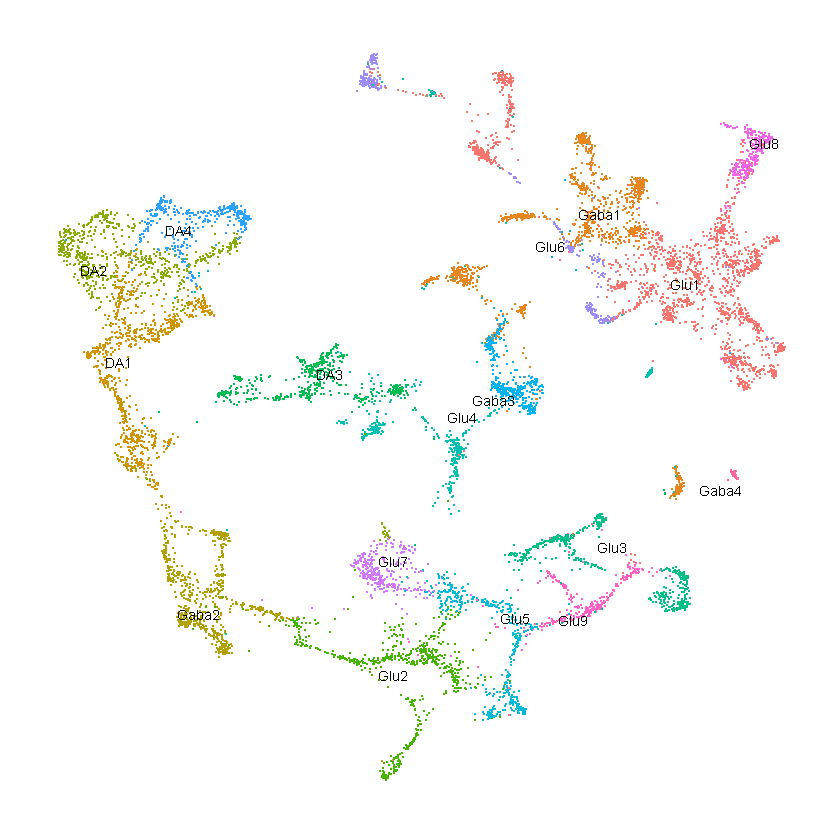

In [52]:
DimPlot(object = VTA.integrated, reduction = "umap", label = TRUE, repel = TRUE, pt.size = 0.1, label.size=3) +
theme_classic() + 
NoLegend() + 
theme(axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())

Extract barcodes as variable names, and assign to metadata

In [53]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(VTA.integrated@assays$RNA@data[,which(Idents(object=VTA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_VTA_YFP",sep=""),intersect(colnames(VTA_YFP@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_VTA_LH",sep=""),intersect(colnames(VTA_LH@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_VTA_NAc",sep=""),intersect(colnames(VTA_NAc@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_VTA_PFC",sep=""),intersect(colnames(VTA_PFC@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

In [54]:
barcode_names <- unique(paste(Idents(VTA.integrated),"_barcode",sep=""))

In [55]:
celltype<-vector()
for (i in 1:dim(VTA.integrated@meta.data)[1]){
    celltype[i]<-toString(new.ident[VTA.integrated@meta.data$integrated_snn_res.0.4[i]])
}
VTA.integrated@meta.data$celltype<-celltype

Plotting the number of cells per cell cluster

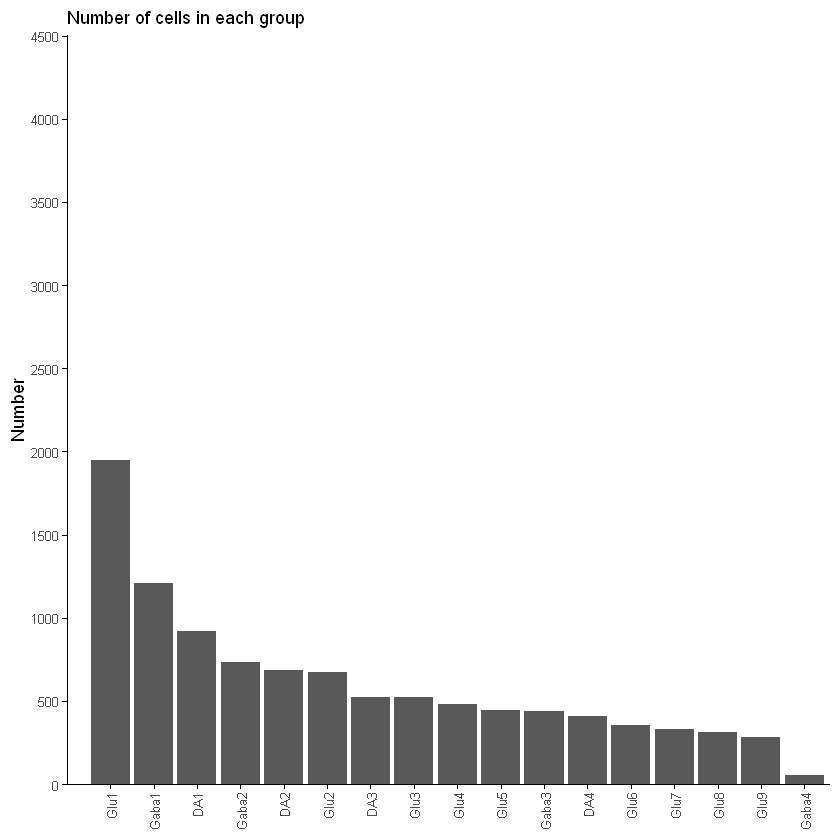

In [59]:
Cells_in_clusters <- as.data.frame(table(Idents(VTA.integrated)))

colnames(Cells_in_clusters)[1] <- "Cluster"
colnames(Cells_in_clusters)[2] <- "Number"

Cells_in_clusters$Cluster <- factor(Cells_in_clusters$Cluster, levels = c("Glu1","Gaba1","DA1","Gaba2","DA2","Glu2","DA3","Glu3","Glu4","Glu5","Gaba3","DA4","Glu6","Glu7","Glu8","Glu9","Gaba4"))

p <- ggplot(data=Cells_in_clusters, aes (x=Cluster, y=Number)) +
geom_bar(stat="identity", position="identity") +
scale_y_continuous(breaks = seq(0, 4503, by = 500), limits=c(0,4503), expand = c(0, 0))+
theme_classic() +
theme(axis.line = element_line(color="black",size=0.1), axis.title.x= element_blank(), axis.text.y=element_text(size=8) ,axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=8, ) ,plot.title=element_text(size=11)) +
theme(legend.title = element_text(size = 10),legend.text = element_text(size = 8), axis.ticks = element_line(colour = "black", size = .25), axis.line = element_line(colour = 'black', size = .25))+
ggtitle("Number of cells in each group") +
expand_limits(x = 0, y = 0) 
#scale_fill_manual(values=group.colors)
p

Proportion of cells in each group

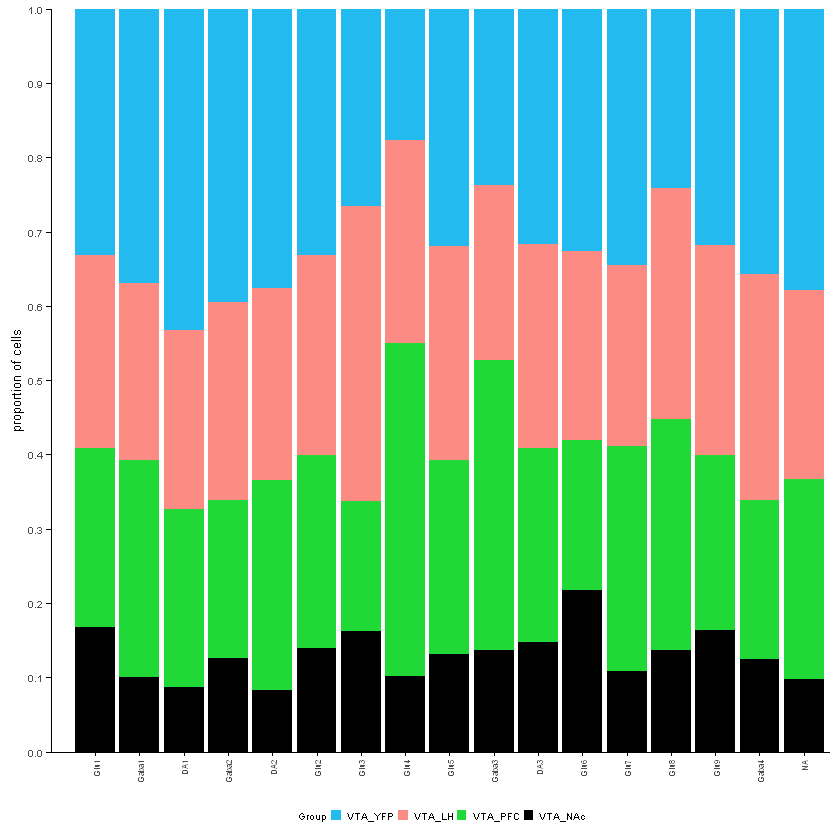

In [60]:
subset <- as.data.frame(table(Idents(VTA.integrated)))
cluster_numbers<- subset[2]

subset <- rep(array(unlist(cluster_numbers)),4)

cluster_by_group <- as.data.frame(table(Idents(VTA.integrated), VTA.integrated$stim))
colnames(cluster_by_group) <- c("Cluster","Group","Cells")
cluster_by_group$Total <- subset

cluster_by_group <- transform(cluster_by_group, prop = Cells/Total)

cluster_by_group$Cluster<-factor(cluster_by_group$Cluster, levels=c("Glu1","Gaba1","DA1","Gaba2","DA2","Glu2","DA3","Glu3","Glu4","Glu5","Gaba3","DA4","Glu6","Glu7","Glu8","Glu9","Gaba4"))

cluster_by_group$Group <- factor(cluster_by_group$Group, levels = c("VTA_YFP","VTA_LH","VTA_PFC","VTA_NAc"), ordered=TRUE)
cluster_by_group$Cluster <- factor(cluster_by_group$Cluster, levels = c("Glu1","Gaba1","DA1","Gaba2","DA2","Glu2","bad","Glu3","Glu4","Glu5","Gaba3","DA3","Glu6","Glu7","Glu8","Glu9","Gaba4"))
group.colors <- c(VTA_YFP="#23bbef",VTA_LH="#fc8b84", VTA_PFC="#21d936", VTA_NAc="black")
p <- ggplot(data=cluster_by_group, aes (x=Cluster, y=prop, fill=Group)) +
    geom_bar(stat="identity", position="stack") +
    scale_y_continuous(breaks = seq(0, 1, by = .1), limits=c(0,1), expand = c(0, 0))+
    theme_classic() +
    theme(axis.line = element_line(color="black",size=0.25), 
          axis.text.y=element_text(size=6),
          axis.title.x = element_blank(), 
          axis.title.y = element_text(size=8),
          axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=5, ) ,
          plot.title=element_blank()) +
    theme(legend.position='bottom',
          legend.title = element_text(size = 6),
          legend.text = element_text(size = 6), 
          axis.ticks = element_line(colour = "black", size = .25), 
          axis.line = element_line(colour = 'black', size = .25),
         legend.key.size = unit(0.1, "in"))+
    ggtitle("Proportion of cells") +
    expand_limits(x = 0, y = 0) +
    scale_fill_manual(values=group.colors)+
    ylab("proportion of cells")
p


Plotting UMIs and genes for each cell cluster

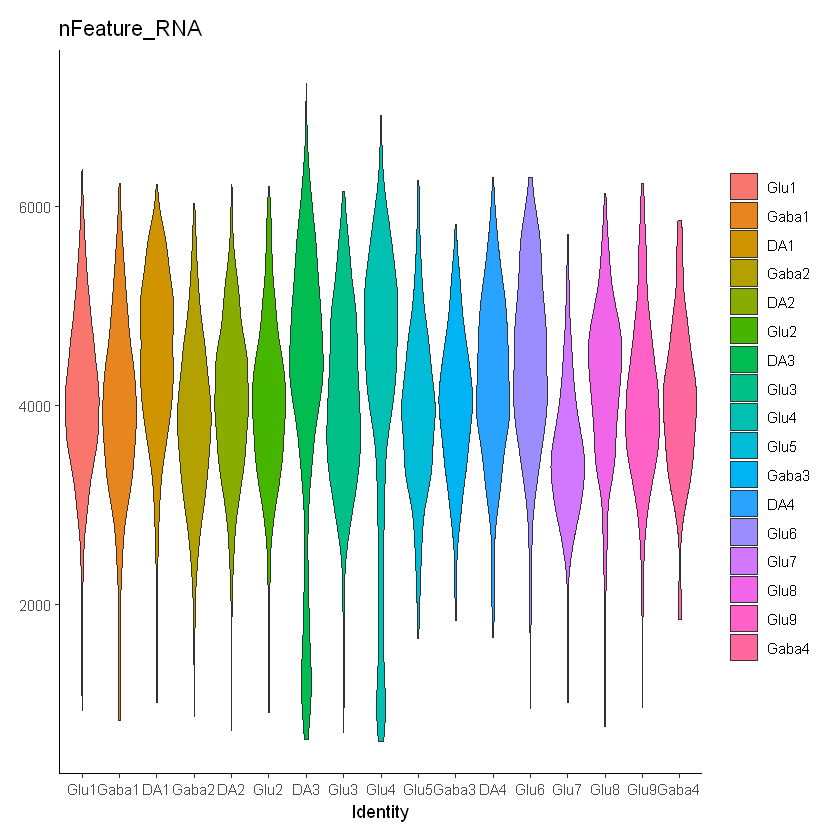

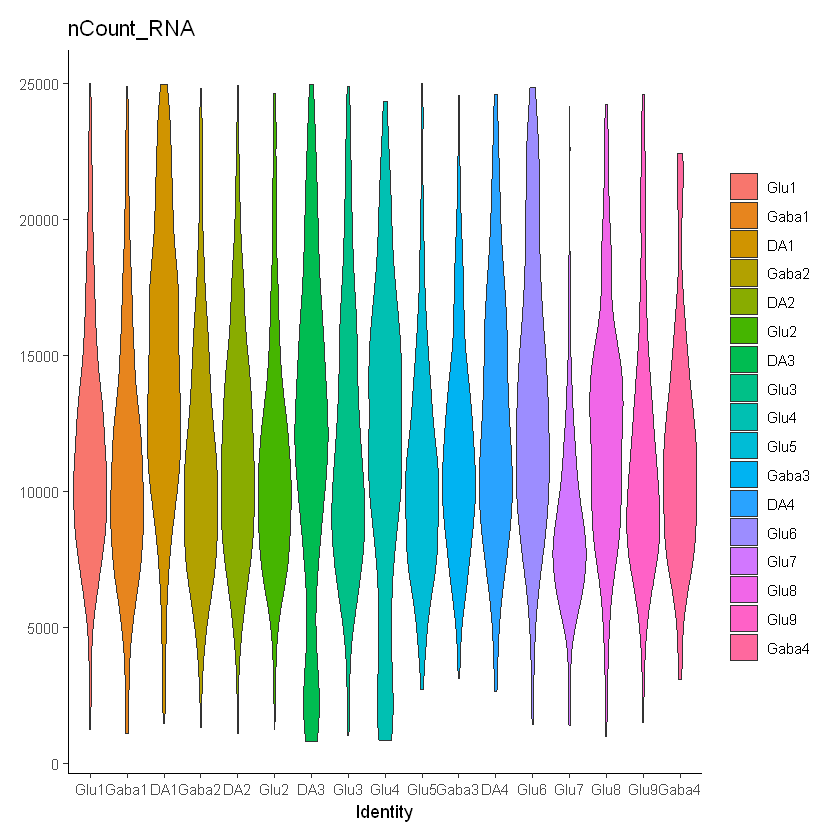

In [58]:
VlnPlot(object = VTA.integrated, features = c('nFeature_RNA'), pt.size=0) + theme_classic()
VlnPlot(object = VTA.integrated, features = c('nCount_RNA'), pt.size=0) + theme_classic()

At a glance, all the cell clusters look of reasonable quality. However, we looked more closely at the distribution of genes/UMIs across cell clusters

In [68]:
wanted_col <- c("celltype","stim","nCount_RNA","nFeature_RNA")
subset <- as.data.frame(VTA.integrated@meta.data[,wanted_col])
subset$stim <- factor(subset$stim, levels=c("VTA_YFP","VTA_LH","VTA_NAc","VTA_PFC"))

In [69]:
subset$celltype <- factor(subset$celltype, levels=c("Glu1","Gaba1","DA1","Gaba2","DA2","Glu2","DA3","Glu3","Glu4","Glu5","Gaba3","DA4","Glu6","Glu7","Glu8","Glu9","Gaba4"))

Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"


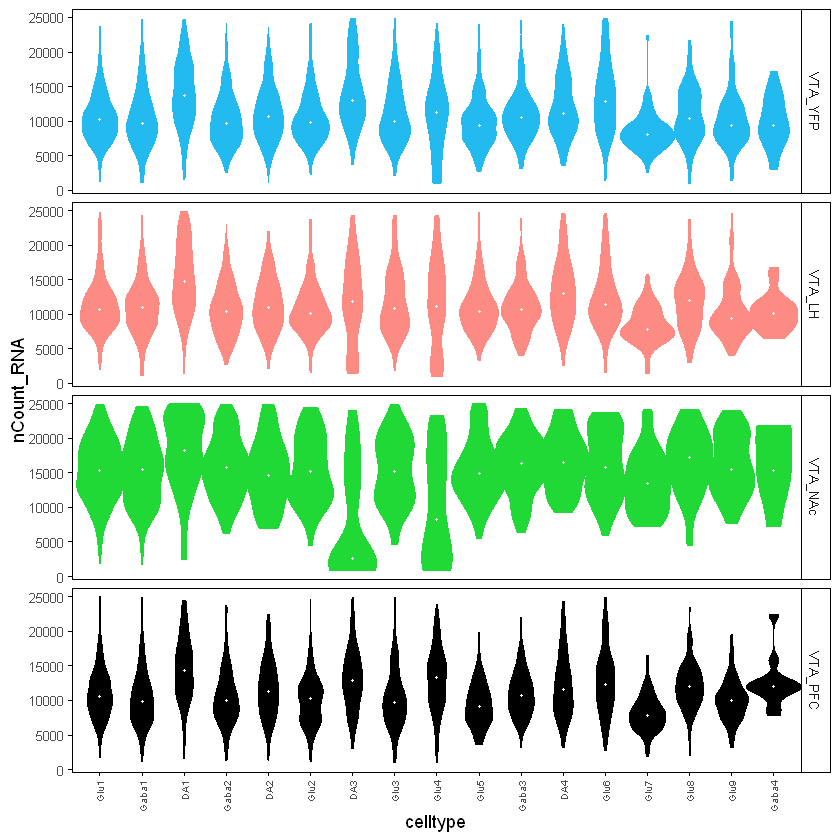

In [70]:
pu <- ggplot(subset, aes(x=celltype, y=nCount_RNA, fill=stim, color=stim,)) + 
    geom_violin(width=1.3, size=0.25) +
    stat_summary(fun.y=median, geom="point", size=0.5, color="white")+
    theme_classic()+
    theme(axis.line = element_line(color="black",size=0.1),
          axis.text.y=element_text(size=8) ,
          axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=6),
          plot.title=element_blank()) +
    theme(legend.title = element_text(size = 8),
          legend.text = element_text(size = 6), 
          axis.ticks = element_line(colour = "black", size = .25), 
          axis.line = element_line(colour = 'black', size = .25))+
    ggtitle("UMI counts by group") +
    scale_fill_manual(values = c("#23bbef", "#fc8b84","#21d936","black"))+
    scale_color_manual(values = c("#23bbef", "#fc8b84","#21d936","black"))

pu + facet_grid(rows = vars(subset$stim)) + NoLegend() +
theme(strip.background = element_rect(color="black", size=0.25, linetype="solid"), strip.text.y = element_text(size = 8),
      panel.background = element_rect(colour = "black", size=0.5, fill=NA))

Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"


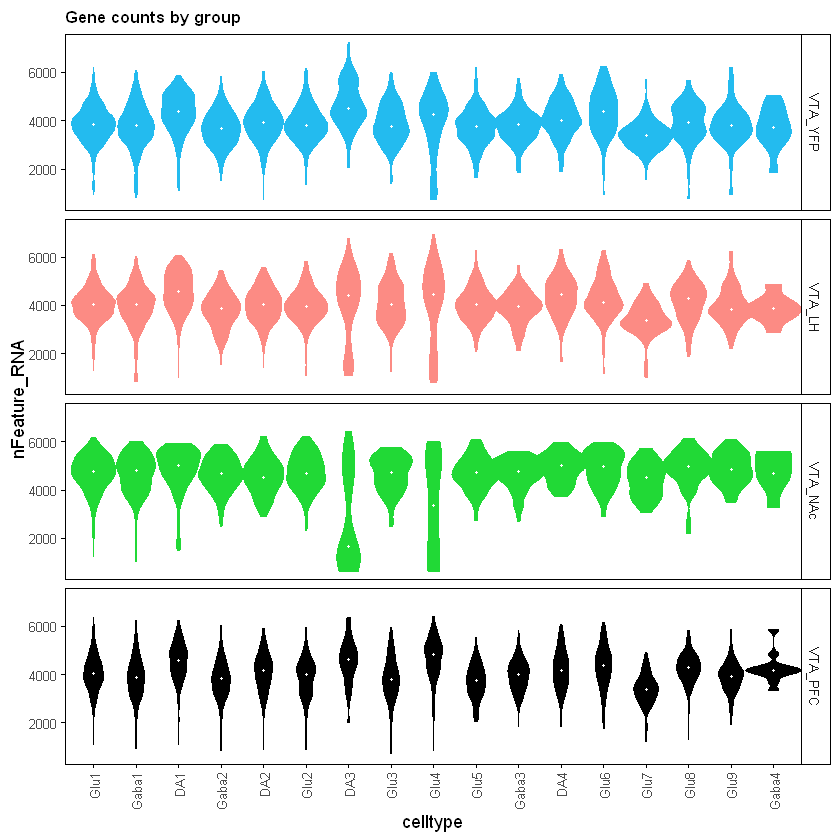

In [71]:
pg <- ggplot(subset, aes(x=celltype, y=nFeature_RNA, fill=stim, color=stim,)) + 
geom_violin(width=1.3, size=0.25) +
stat_summary(fun.y=median, geom="point", size=0.5, color="white")+
theme_classic()+
theme(axis.line = element_line(color="black",size=0.1), axis.text.y=element_text(size=8) ,axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=8) ,plot.title=element_text(size=10, face="bold")) +
theme(legend.title = element_text(size = 11),legend.text = element_text(size = 8), axis.ticks = element_line(colour = "black", size = .25), axis.line = element_line(colour = 'black', size = .25))+
ggtitle("Gene counts by group") +
scale_fill_manual(values = c("#23bbef", "#fc8b84","#21d936","black"))+
scale_color_manual(values = c("#23bbef", "#fc8b84","#21d936","black"))
pg + facet_grid(rows = vars(subset$stim)) + NoLegend() +
theme(strip.background = element_rect(color="black", size=0.25, linetype="solid"), strip.text.y = element_text(size = 8),
      panel.background = element_rect(colour = "black", size=.5, fill=NA))

The NAc group for whatever reason is depleted for both genes and UMIs in DA3 and Glu4 clusters. Therefore, we decided to exclude these two clusters as well. We also detected elevated Apoe expression in Glu4, indicating either glial contamination or poor neuronal health.

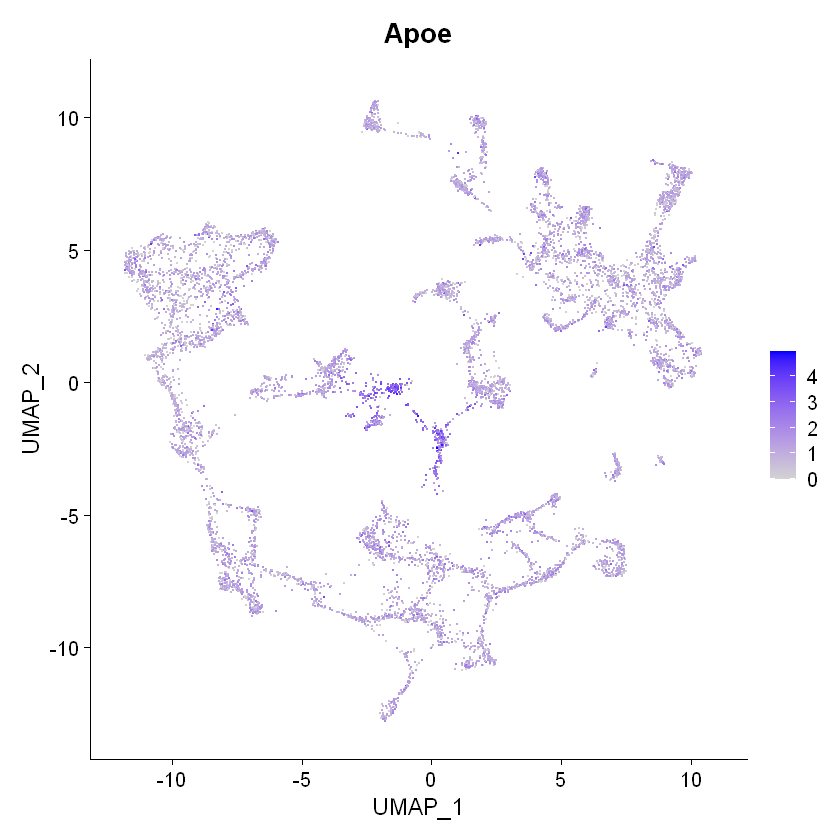

In [45]:
FeaturePlot(VTA.integrated,'Apoe')

Removing Glu4 and DA3 from the dataset due to depleted read coverage and poor group representation

In [72]:
bad_cells <- c(DA3_barcode, Glu4_barcode)

In [78]:
Retained_cells_YFP_id <- colnames(subset(VTA_YFP, cells=bad_cells, invert=TRUE))
Retained_cells_LH_id <- colnames(subset(VTA_LH, cells=bad_cells, invert=TRUE ))
Retained_cells_PFC_id <- colnames(subset(VTA_PFC, cells=bad_cells, invert=TRUE))
Retained_cells_NAc_id <- colnames(subset(VTA_NAc, cells=bad_cells, invert=TRUE))

In [86]:
final_cells <- c(Retained_cells_YFP_id, Retained_cells_LH_id, Retained_cells_PFC_id, Retained_cells_NAc_id)

[1] 9336

## Iteration 3

In [ ]:
VTA_YFP.data <-Read10X(data.dir = "D:/scRNAseq/30-453842648/01_analysis/cellranger_count/YFP/raw_feature_bc_matrix")
colnames(VTA_YFP.data) = paste0(colnames(VTA_YFP.data),"VTA_YFP")
VTA_YFP<- CreateSeuratObject(counts = VTA_YFP.data, min.cells = 3, min.features = 200, project = "VTA_input")
new_barcodes <- gsub("-1","",colnames(VTA_YFP))
VTA_YFP <- RenameCells(VTA_YFP, new.names = new_barcodes)
VTA_YFP@meta.data$stim <- "VTA_YFP"
Neuron_id<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter10/final_cells.rds")
VTA_YFP<-subset(x = VTA_YFP, cells=Neuron_id,)

VTA_LH.data <-Read10X(data.dir = "D:/scRNAseq/30-573274809/01_analysis/cellranger_count/LH/raw_feature_bc_matrix")
colnames(VTA_LH.data) = paste0(colnames(VTA_LH.data),"VTA_LH")
VTA_LH<- CreateSeuratObject(counts = VTA_LH.data, min.cells = 3, min.features = 200, project = "VTA_input")
new_barcodes <- gsub("-1","",colnames(VTA_LH))
VTA_LH <- RenameCells(VTA_LH, new.names = new_barcodes)
VTA_LH@meta.data$stim <- "VTA_LH"
Neuron_id<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter10/final_cells.rds")
VTA_LH<-subset(x = VTA_LH, cells=Neuron_id)

VTA_NAc.data <-Read10X(data.dir = "D:/scRNAseq/30-573274809/01_analysis/cellranger_count/NAc/raw_feature_bc_matrix")
colnames(VTA_NAc.data) = paste0(colnames(VTA_NAc.data),"VTA_NAc")
VTA_NAc<- CreateSeuratObject(counts = VTA_NAc.data, min.cells = 3, min.features = 200, project = "VTA_input")
new_barcodes <- gsub("-1","",colnames(VTA_NAc))
VTA_NAc <- RenameCells(VTA_NAc, new.names = new_barcodes)
VTA_NAc@meta.data$stim <- "VTA_NAc"
Neuron_id<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter10/final_cells.rds")
VTA_NAc<-subset(x = VTA_NAc, cells=Neuron_id)

VTA_PFC.data <-Read10X(data.dir = "D:/scRNAseq/30-573274809/01_analysis/cellranger_count/PFC/raw_feature_bc_matrix")
colnames(VTA_PFC.data) = paste0(colnames(VTA_PFC.data),"VTA_PFC")
VTA_PFC<- CreateSeuratObject(counts = VTA_PFC.data, min.cells = 3, min.features = 200, project = "VTA_input")
new_barcodes <- gsub("-1","",colnames(VTA_PFC))
VTA_PFC <- RenameCells(VTA_PFC, new.names = new_barcodes)
VTA_PFC@meta.data$stim <- "VTA_PFC"
Neuron_id<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter10/final_cells.rds")
VTA_PFC<-subset(x = VTA_PFC, cells=Neuron_id)

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =VTA_YFP), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = VTA_YFP, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = VTA_YFP, slot = 'counts'))
VTA_YFP[['percent.mito']] <- percent.mito

mito.features <- grep(pattern = "^mt-", x = rownames(x =VTA_LH), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = VTA_LH, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object =VTA_LH, slot = 'counts'))
VTA_LH[['percent.mito']] <- percent.mito

mito.features <- grep(pattern = "^mt-", x = rownames(x =VTA_NAc), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = VTA_NAc, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = VTA_NAc, slot = 'counts'))
VTA_NAc[['percent.mito']] <- percent.mito

mito.features <- grep(pattern = "^mt-", x = rownames(x =VTA_PFC), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = VTA_PFC, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = VTA_PFC, slot = 'counts'))
VTA_PFC[['percent.mito']] <- percent.mito

Sample normalization, scaling, integration, and dimensionality reduction

In [ ]:
VTA_YFP<- NormalizeData(object = VTA_YFP,verbose = FALSE) 
VTA_LH <- NormalizeData(object = VTA_LH,verbose = FALSE) 
VTA_NAc <- NormalizeData(object = VTA_NAc,verbose = FALSE)
VTA_PFC <- NormalizeData(object = VTA_PFC,verbose = FALSE) 

In [ ]:
VTA_YFP<- FindVariableFeatures(object =VTA_YFP,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object = VTA_YFP))
VTA_LH<- FindVariableFeatures(object =VTA_LH,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object =VTA_LH))
VTA_NAc<- FindVariableFeatures(object =VTA_NAc,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object = VTA_NAc))
VTA_PFC<- FindVariableFeatures(object =VTA_PFC,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object = VTA_PFC))

In [ ]:
VTA.list<-objects()
VTA.list$VTA_YFP<-VTA_YFP
VTA.list$VTA_LH<-VTA_LH
VTA.list$VTA_NAc<-VTA_NAc
VTA.list$VTA_PFC<-VTA_PFC

In [ ]:
reference.list <- VTA.list[c("VTA_YFP","VTA_LH","VTA_NAc","VTA_PFC")]
VTA.anchors <- FindIntegrationAnchors(object.list = reference.list, dims = 1:30)
VTA.integrated <- IntegrateData(anchorset = VTA.anchors, dims = 1:30)

In [ ]:
VTA.integrated <- ScaleData(object = VTA.integrated, , vars.to.regress = c("nCount_RNA", "percent.mito"),verbose = FALSE)

In [ ]:
VTA.integrated <- RunPCA(object = VTA.integrated, npcs = 30, verbose = FALSE)# npcs 50 default

In [ ]:
VTA.integrated <- RunUMAP(object = VTA.integrated, reduction = "pca", dims = 1:30)

In [ ]:
DimPlot(object = VTA.integrated, reduction = "umap", group.by = "stim")

Identifying clusters

In [ ]:
VTA.integrated <- FindNeighbors(object = VTA.integrated, dims=1:30)

In [ ]:
VTA.integrated <- FindClusters(VTA.integrated, resolution = 0.4, dims.use = 1:30)

Loading in previously generated .rds files (seurat objects)

In [87]:
VTA.integrated<-readRDS(file="/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter10/VTA_integrated.rds")
VTA_YFP <- readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter10/VTA_YFP.rds")
VTA_LH <- readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter10/VTA_LH.rds")
VTA_PFC <- readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter10/VTA_PFC.rds")
VTA_NAc <- readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter10/VTA_NAc.rds")

Assigning names to cell types

In [90]:
new.ident <- c("Glu1","CoEx1","Gaba1","DA1","DA2","Gaba2","Glu2","Glu3","Glu4","DA3","Glu5","Glu6","Glu7","CoEx2","CoEx3","Gaba3","Gaba4")
names(x = new.ident) <- levels(x =VTA.integrated)
VTA.integrated<- RenameIdents(object =VTA.integrated, new.ident)

In [91]:
table(Idents(VTA.integrated))


 Glu1 CoEx1 Gaba1   DA1   DA2 Gaba2  Glu2  Glu3  Glu4   DA3  Glu5  Glu6  Glu7 
 1448   818   817   794   768   726   677   623   466   444   361   336   332 
CoEx2 CoEx3 Gaba3 Gaba4 
  309   246   114    57 

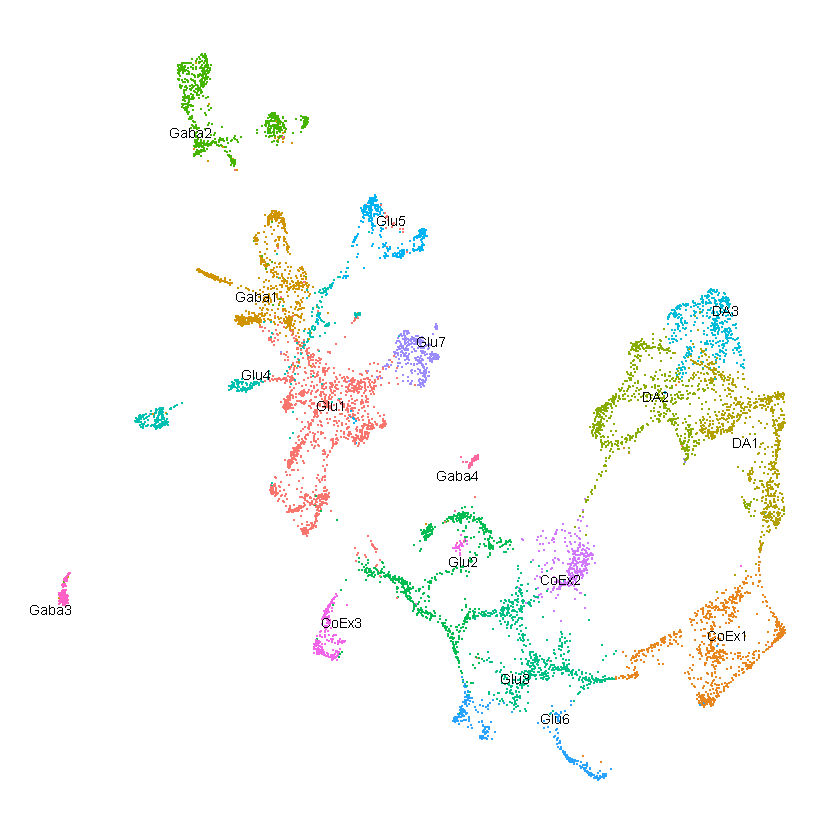

In [92]:
DimPlot(object = VTA.integrated, reduction = "umap", label = TRUE, repel = TRUE, pt.size = 0.1, label.size=3) +
theme_classic() + 
NoLegend() + 
theme(axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())

Extract barcodes as variable names, and assign to metadata

In [93]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(VTA.integrated@assays$RNA@data[,which(Idents(object=VTA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_VTA_YFP",sep=""),intersect(colnames(VTA_YFP@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_VTA_LH",sep=""),intersect(colnames(VTA_LH@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_VTA_NAc",sep=""),intersect(colnames(VTA_NAc@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_VTA_PFC",sep=""),intersect(colnames(VTA_PFC@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

In [94]:
barcode_names <- unique(paste(Idents(VTA.integrated),"_barcode",sep=""))

In [96]:
celltype<-vector()
for (i in 1:dim(VTA.integrated@meta.data)[1]){
    celltype[i]<-toString(new.ident[VTA.integrated@meta.data$integrated_snn_res.0.5[i]])
}
VTA.integrated@meta.data$celltype<-celltype

Plotting the number of cells per cell cluster

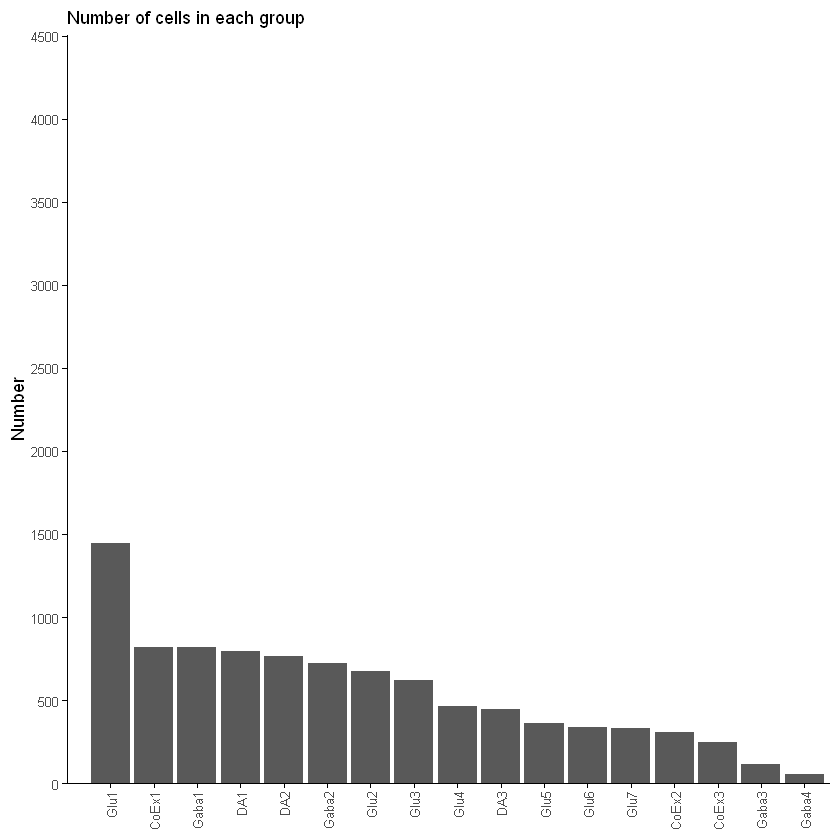

In [98]:
Cells_in_clusters <- as.data.frame(table(Idents(VTA.integrated)))

colnames(Cells_in_clusters)[1] <- "Cluster"
colnames(Cells_in_clusters)[2] <- "Number"

Cells_in_clusters$Cluster <- factor(Cells_in_clusters$Cluster, levels = c("Glu1","CoEx1","Gaba1","DA1","DA2","Gaba2","Glu2","Glu3","Glu4","DA3","Glu5","Glu6","Glu7","CoEx2","CoEx3","Gaba3","Gaba4"))

p <- ggplot(data=Cells_in_clusters, aes (x=Cluster, y=Number)) +
geom_bar(stat="identity", position="identity") +
scale_y_continuous(breaks = seq(0, 4503, by = 500), limits=c(0,4503), expand = c(0, 0))+
theme_classic() +
theme(axis.line = element_line(color="black",size=0.1), axis.title.x= element_blank(), axis.text.y=element_text(size=8) ,axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=8, ) ,plot.title=element_text(size=11)) +
theme(legend.title = element_text(size = 10),legend.text = element_text(size = 8), axis.ticks = element_line(colour = "black", size = .25), axis.line = element_line(colour = 'black', size = .25))+
ggtitle("Number of cells in each group") +
expand_limits(x = 0, y = 0) 
#scale_fill_manual(values=group.colors)
p

Proportion of cells in each group

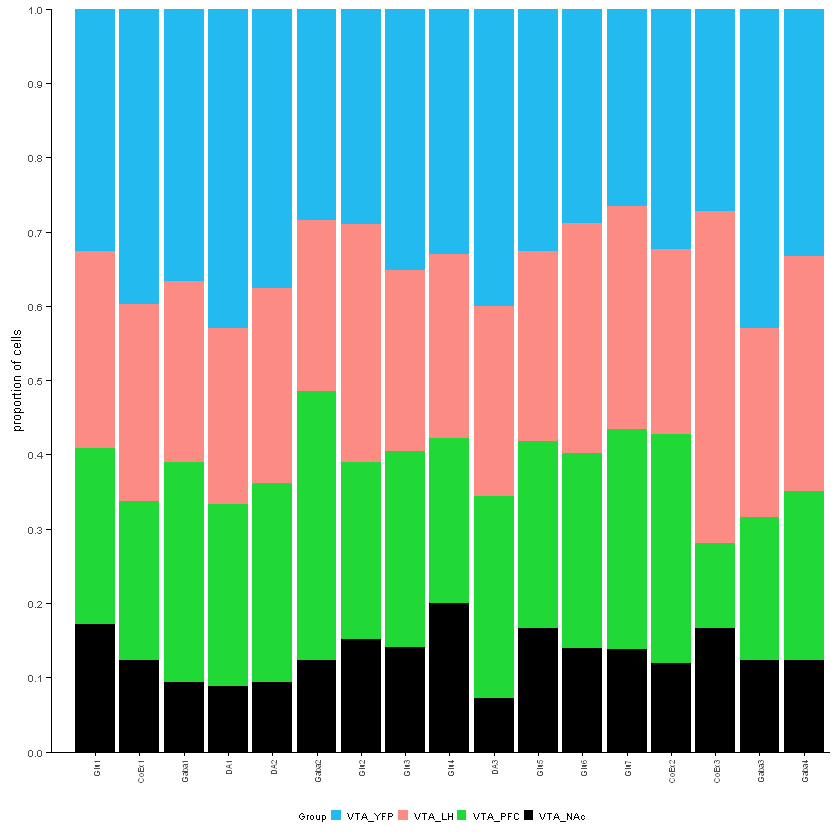

In [99]:
subset <- as.data.frame(table(Idents(VTA.integrated)))
cluster_numbers<- subset[2]

subset <- rep(array(unlist(cluster_numbers)),4)

cluster_by_group <- as.data.frame(table(Idents(VTA.integrated), VTA.integrated$stim))
colnames(cluster_by_group) <- c("Cluster","Group","Cells")
cluster_by_group$Total <- subset

cluster_by_group <- transform(cluster_by_group, prop = Cells/Total)

cluster_by_group$Cluster<-factor(cluster_by_group$Cluster, levels=c("Glu1","CoEx1","Gaba1","DA1","DA2","Gaba2","Glu2","Glu3","Glu4","DA3","Glu5","Glu6","Glu7","CoEx2","CoEx3","Gaba3","Gaba4"))

cluster_by_group$Group <- factor(cluster_by_group$Group, levels = c("VTA_YFP","VTA_LH","VTA_PFC","VTA_NAc"), ordered=TRUE)
cluster_by_group$Cluster <- factor(cluster_by_group$Cluster, levels = c("Glu1","CoEx1","Gaba1","DA1","DA2","Gaba2","Glu2","Glu3","Glu4","DA3","Glu5","Glu6","Glu7","CoEx2","CoEx3","Gaba3","Gaba4"))
group.colors <- c(VTA_YFP="#23bbef",VTA_LH="#fc8b84", VTA_PFC="#21d936", VTA_NAc="black")
p <- ggplot(data=cluster_by_group, aes (x=Cluster, y=prop, fill=Group)) +
    geom_bar(stat="identity", position="stack") +
    scale_y_continuous(breaks = seq(0, 1, by = .1), limits=c(0,1), expand = c(0, 0))+
    theme_classic() +
    theme(axis.line = element_line(color="black",size=0.25), 
          axis.text.y=element_text(size=6),
          axis.title.x = element_blank(), 
          axis.title.y = element_text(size=8),
          axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=5, ) ,
          plot.title=element_blank()) +
    theme(legend.position='bottom',
          legend.title = element_text(size = 6),
          legend.text = element_text(size = 6), 
          axis.ticks = element_line(colour = "black", size = .25), 
          axis.line = element_line(colour = 'black', size = .25),
         legend.key.size = unit(0.1, "in"))+
    ggtitle("Proportion of cells") +
    expand_limits(x = 0, y = 0) +
    scale_fill_manual(values=group.colors)+
    ylab("proportion of cells")
p


Plotting UMIs and genes for each cell cluster

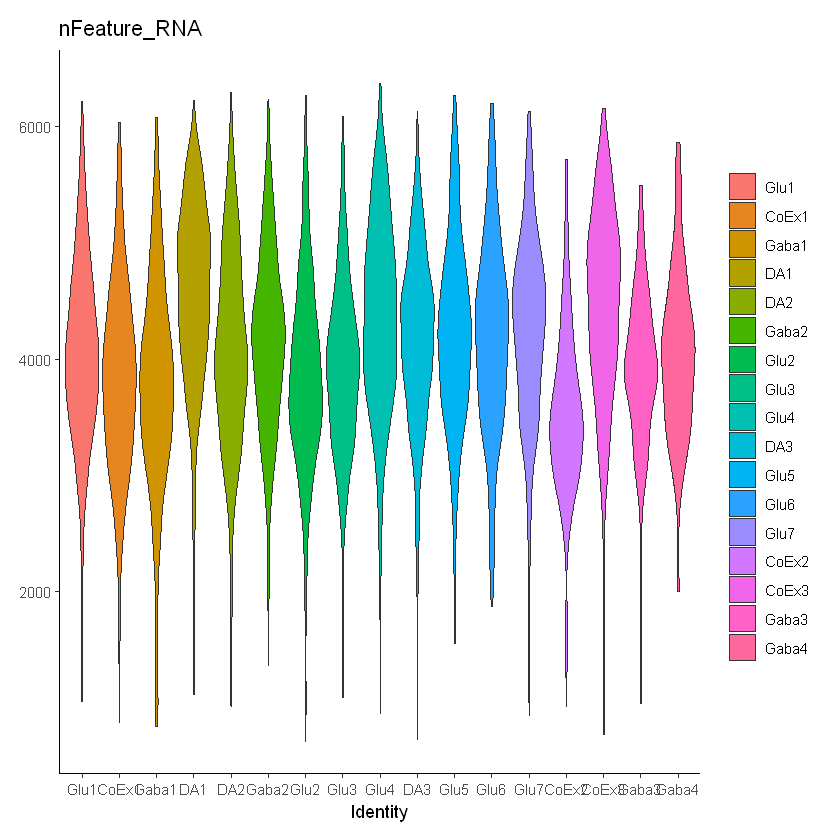

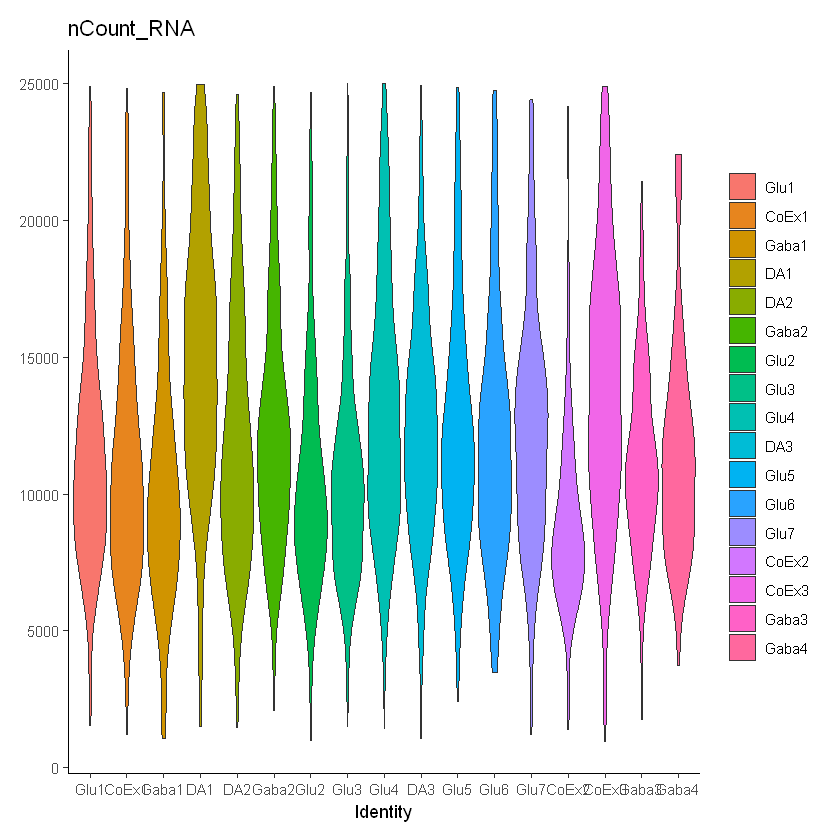

In [100]:
VlnPlot(object = VTA.integrated, features = c('nFeature_RNA'), pt.size=0) + theme_classic()
VlnPlot(object = VTA.integrated, features = c('nCount_RNA'), pt.size=0) + theme_classic()